In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-in-egypt/Cars.csv


| Attribute | Description |
|----------|----------|
|Brand	|The brand of the car
|Model	|The Model of the car
|Body	|The Body of the car
|Year	|The year or edition of the model
|Color	|The color the car
|Fuel	|The type of fuel used by the car
|Kilometers	|The range kilometers driven in the car by the previous owner(s) in KM
|Engine	|The displacement volume of the engine in cc
|Transmission	|The type of transmission used by the car
|Price	|The price of the used car
|Gov	|The Gov in which the car is being sold or is available for purchase

# Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading Data

In [3]:
df = pd.read_csv('/kaggle/input/used-car-price-in-egypt/Cars.csv')

# Exploring Data

In [4]:
df.head()# Will give you first 5 records

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [5]:
#gain insights of your data set and see general information about each feature and the total number of non-null values in each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


- Well, as a first observation, we can see that we're lucky, because we don't have missing values in some of the columns.

- unnamed0 ----> drop column

In [6]:
#You can get idea that gives summary statstics for only intersting numerical features in your data set.
df.describe()

,Unnamed: 0,Year,Price
count,14741.000000,14741.000000,14741.000000
mean,8934.846754,2005.456821,116.584987
std,4922.065495,12.655566,82.192718
min,812.000000,1970.000000,3.000000
25%,4497.000000,1998.000000,43.700000
50%,8182.000000,2010.000000,110.000000
75%,13373.000000,2015.000000,161.000000
max,17058.000000,2022.000000,471.500000


 * Year Range : 1970 - 2022
 * Price Range : 3 -  471

In [7]:
df.drop('Unnamed: 0' , axis =1 , inplace = True )

# Data Cleaning

In [8]:
df_clean = df.copy()

In [9]:
df_clean.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


## Check Missing Values

In [10]:
df.isnull().sum()

Brand           0
Model           0
Body            0
Color           0
Year            0
Fuel            0
Kilometers      0
Engine          0
Transmission    0
Price           0
Gov             0
dtype: int64

### Check Duplicated

In [11]:
df_clean.duplicated().sum()

1

In [12]:
df_clean.drop_duplicates(inplace=True)

In [13]:
df_clean.duplicated().sum()

0

# Feature Engineering


In [14]:
df_clean.Kilometers.value_counts()

More than 200000    2505
10000 to 19999      1666
180000 to 199999    1349
100000 to 119999    1192
0 to 9999           1088
140000 to 159999    1064
120000 to 139999    1005
90000 to 99999       995
160000 to 179999     760
20000 to 29999       612
80000 to 89999       560
50000 to 59999       436
60000 to 69999       402
40000 to 49999       372
30000 to 39999       370
70000 to 79999       364
Name: Kilometers, dtype: int64

In [15]:
def Get_kilometers(Num):
  
  if Num == "More than 200000":
    Kilo = Num.split(" ")[2]    # Handling the Text 'More than 200000' by exchange it to integer 2000000

  else : 
    Kilo = Num.split(sep="to")[0]
    Kilo = Kilo.strip()        # Handling '140000 to 159999' by Spliting them and Choose the Median

    if len(Kilo) <= 5 :
      Kilo = ( int(Kilo) + ( int(Kilo) + 10000 ))/2  # the Pattern was noticed is that if data below 100000 kilometers the range is 10000 more and Vice versa                                                      

    elif len(Kilo) >= 6 :
      Kilo = ( int(Kilo) + ( int(Kilo) + 20000 ))/2             

  return Kilo 
   

In [16]:
df_clean['Kilometers'] = df_clean.Kilometers.apply(Get_kilometers)
df_clean['Kilometers'] = df_clean['Kilometers'].astype(int) # Convert the Column to integer
df_clean.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600 CC,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1000 - 1300 CC,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1400 - 1500 CC,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600 CC,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1000 - 1300 CC,Manual,75.0,Giza


In [17]:
def Get_Engine(Num):

   if (len(Num) > 7) : # Spliting The data whose Length is more than 7 by spliting the range and remove 'CC' an Take Maximum

      Eng = Num.split(sep="-")[1]
      Eng = Eng.strip('CC')
      Eng = int(Eng)
   
   else:  # Spliting The data whose Length is less than 7 by remove 'CC' an Take Maximum 
      Eng = Num.strip('CC')
      Eng = int(Eng)

   return Eng

In [18]:
df_clean['Engine'] = df_clean.Engine.apply(Get_Engine)
df_clean.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1300,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1500,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1300,Manual,75.0,Giza


In [19]:
df_clean.describe()

,Year,Kilometers,Engine,Price
count,14740.000000,14740.000000,14740.000000,14740.000000
mean,2005.458277,108740.502035,1496.729986,116.591608
std,12.654761,69892.448572,120.028488,82.191575
min,1970.000000,5000.000000,1300.000000,3.000000
25%,1998.000000,35000.000000,1500.000000,43.700000
50%,2010.000000,110000.000000,1500.000000,110.000000
75%,2015.000000,190000.000000,1600.000000,161.000000
max,2022.000000,200000.000000,1600.000000,471.500000


In [20]:
max_Year = df_clean.Year.max()
max_Year

2022

In [21]:
df_clean['Age_of_Car'] = (max_Year - df_clean['Year'])

In [22]:
df_clean.drop('Year',axis=1 ,inplace=True)

In [23]:
df_clean.head()

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Price,Gov,Age_of_Car
0,Hyundai,Accent,Sedan,Black,Benzine,150000,1600,Automatic,140.0,Giza,15
1,Hyundai,Accent,Sedan,Silver,Benzine,190000,1300,Manual,78.0,Qena,17
2,Hyundai,Accent,Sedan,Gray,Benzine,150000,1500,Manual,70.0,Giza,23
3,Hyundai,Accent,Sedan,Blue- Navy Blue,Benzine,150000,1600,Automatic,150.0,Cairo,13
4,Hyundai,Accent,Sedan,Silver,Benzine,15000,1300,Manual,75.0,Giza,22


# Data Visualisation  

- The term Univariate Analysis refers to the analysis of only one variable. The aim is to analyse and find out patterns specific to a single variable

In [24]:
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()
cat_cols

['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Transmission', 'Gov']

In [25]:
for col in cat_cols:
    print(df_clean[col].value_counts())
    print('------------------------------------------------------------')

Hyundai      5692
Fiat         5032
Chevrolet    4016
Name: Brand, dtype: int64
------------------------------------------------------------
128        2424
Verna      1903
Elantra    1529
Lanos      1342
Accent     1272
Optra      1252
Shahin     1142
Aveo        994
131         572
Cruze       428
Uno         350
Avante      282
Tipo        274
Punto       270
Matrix      268
Tucson      182
I10         166
Excel        90
Name: Model, dtype: int64
------------------------------------------------------------
Sedan        13452
Hatchback     1106
SUV            182
Name: Body, dtype: int64
------------------------------------------------------------
White              2614
Black              2032
Silver             1952
Gray               1670
Red                1537
Blue- Navy Blue    1406
Other Color        1134
Burgundy           1061
Green               456
Gold                374
Beige               152
Brown               140
Yellow              134
Orange               78
Name:

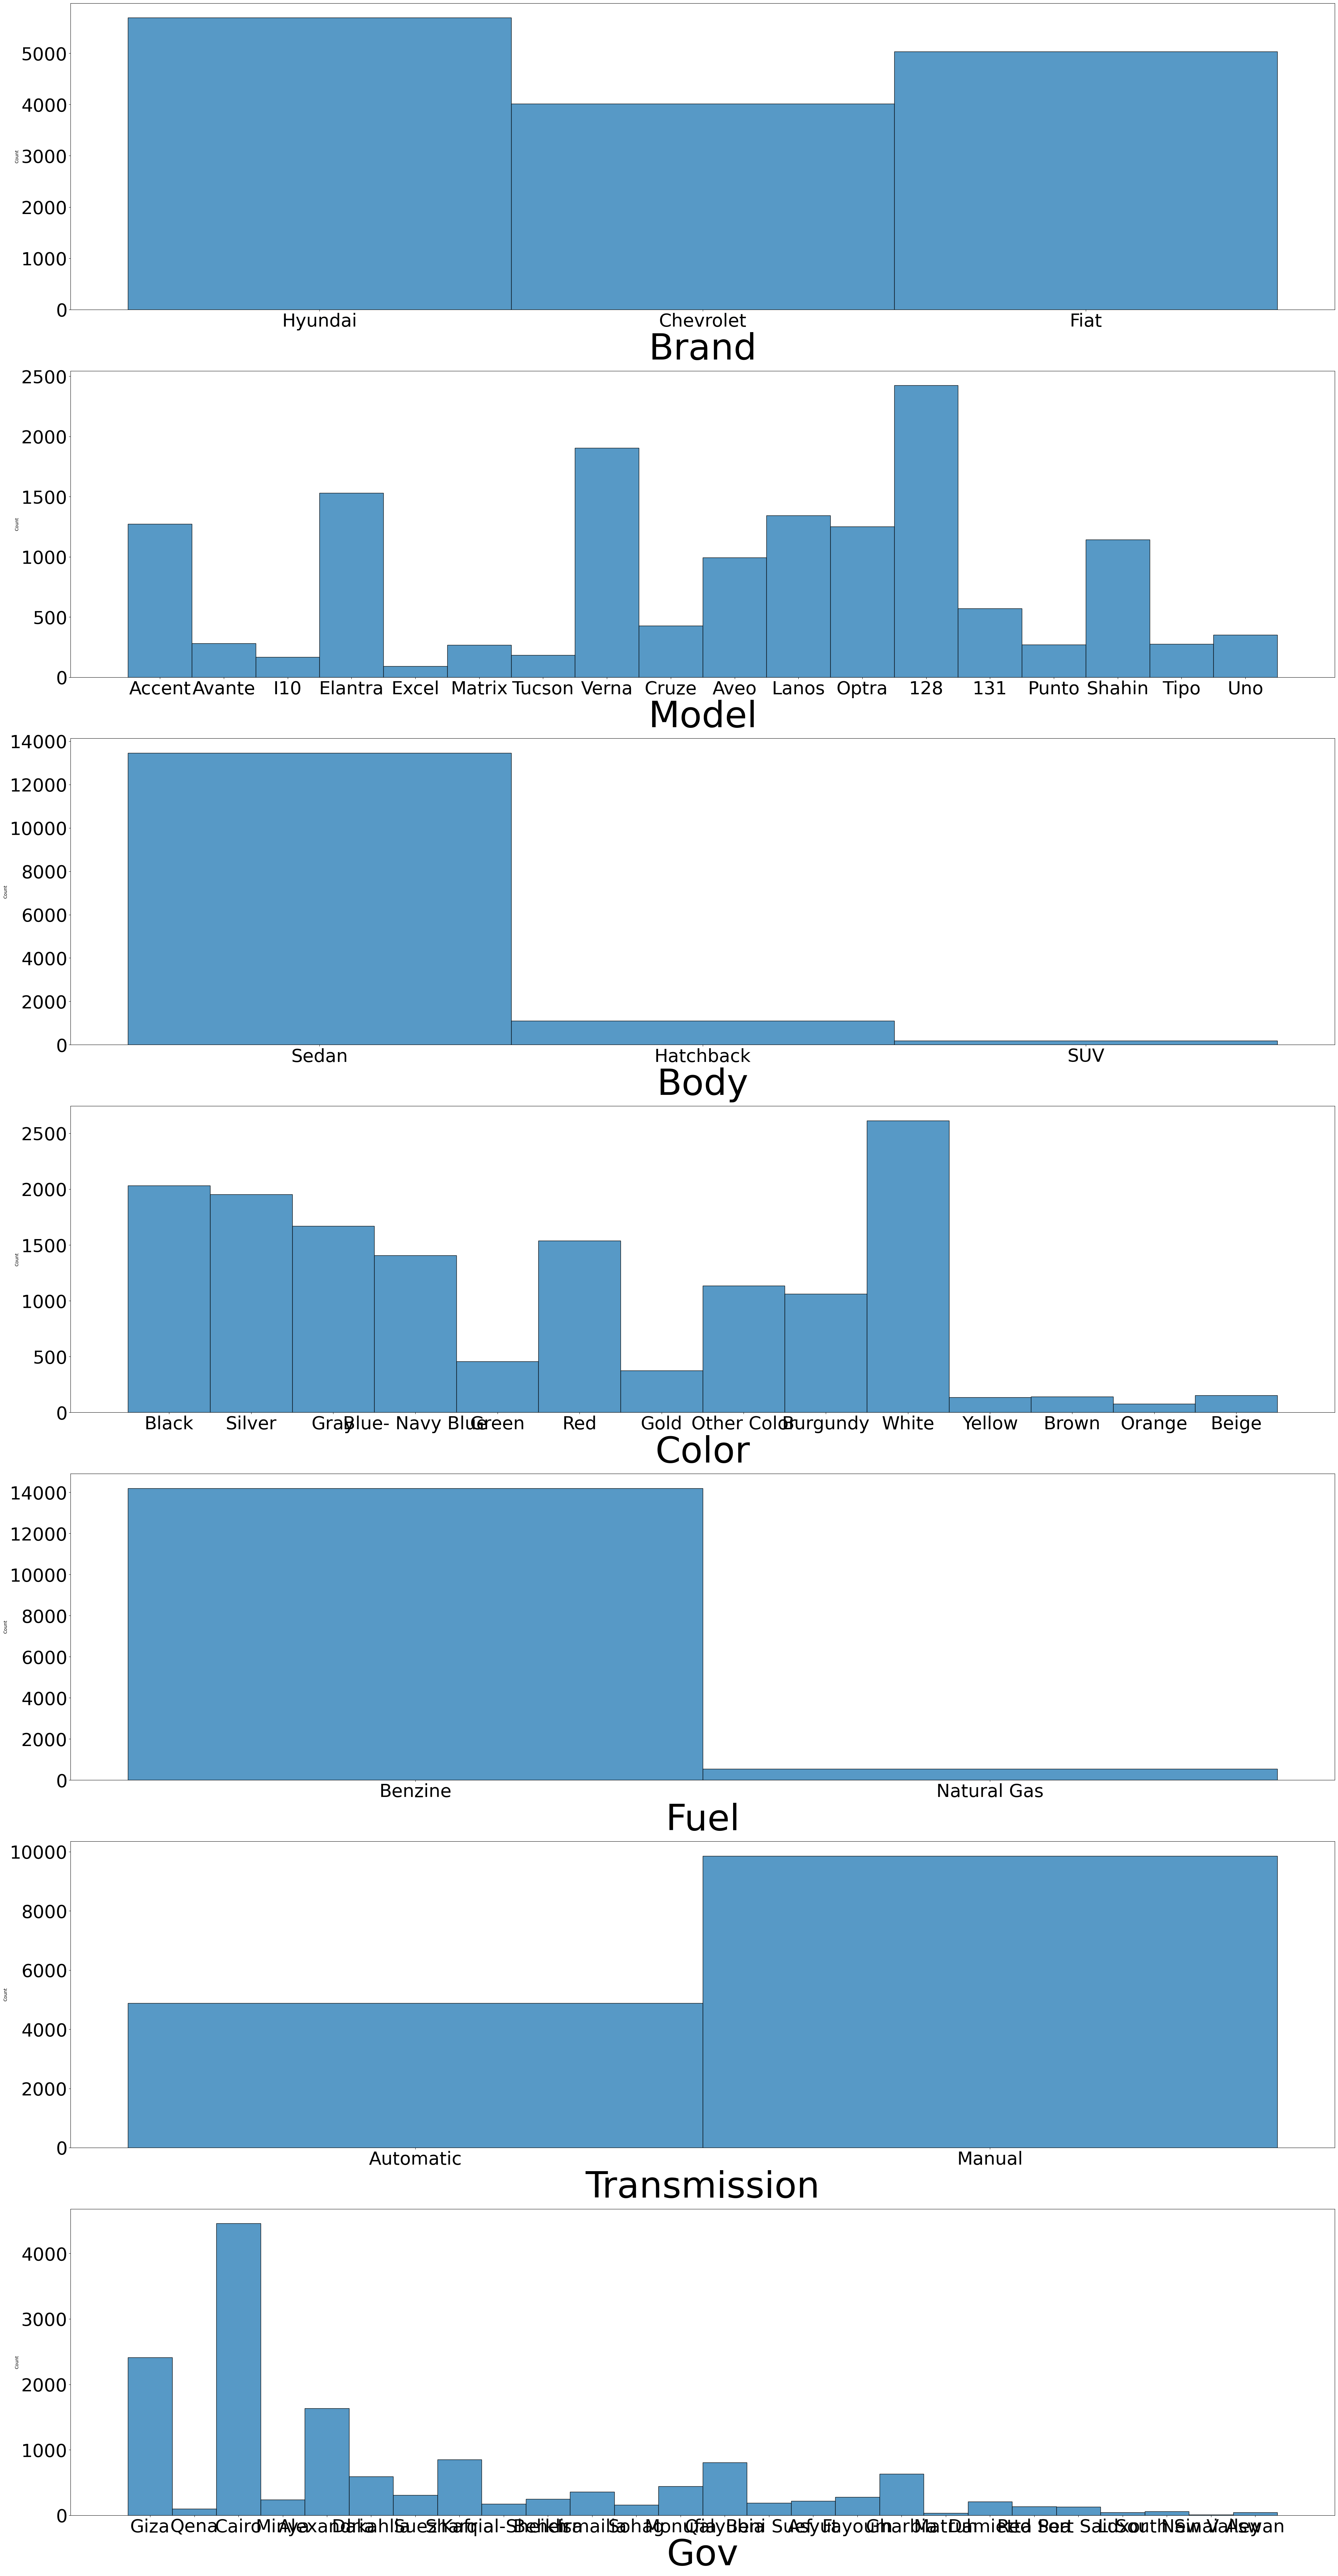

In [26]:
plt.figure(figsize = (50 , 100))
for i , col in enumerate (cat_cols  ,1) :
    plt.subplot((len(cat_cols)//1) , 1 , i )
    sns.histplot(data = df_clean , x = col)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.xlabel(col, fontsize=80)
    

- brand --->  most popular is Htheyundai
- Model ---> Although the most common __brand is Hyundai__, the most popular model is the __128__    
- Body --->  most popular is Sedan 
- Color ---> most popular is White              
- Fuel ---> It is natural that Benzine is the most, because natural gas is one of the types that appeared recently 
- Transmission ---> With the continuous development in the world of cars, automatic cars are modern and help trainees to drive well, __while manual cars are the basis for driving education, so it is natural that they are the most popular.__
- Gov ---> Given that __Cairo__ is the capital of Egypt and the center of life services in it, as it has __the largest number__ of families among the population, it is natural that the governorates use the most cars.

In [27]:
num_cols = df_clean.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Kilometers', 'Engine', 'Price', 'Age_of_Car']

In [28]:
for col in num_cols:
    print(df_clean[col].value_counts())
    print('------------------------------------------------------------')

200000    2505
15000     1666
190000    1349
110000    1192
5000      1088
150000    1064
130000    1005
95000      995
170000     760
25000      612
85000      560
55000      436
65000      402
45000      372
35000      370
75000      364
Name: Kilometers, dtype: int64
------------------------------------------------------------
1600    6762
1500    4356
1300    3622
Name: Engine, dtype: int64
------------------------------------------------------------
115.0    254
23.0     234
138.0    209
161.4    195
185.6    195
        ... 
122.5      1
68.5       1
202.0      1
111.1      1
46.6       1
Name: Price, Length: 631, dtype: int64
------------------------------------------------------------
9     850
12    763
11    728
7     727
10    693
5     690
8     622
3     607
13    591
4     574
6     562
14    485
1     388
16    348
2     346
15    300
21    260
23    241
22    231
20    230
24    219
17    218
35    212
19    211
32    211
43    209
40    198
18    185
25    183
26    17

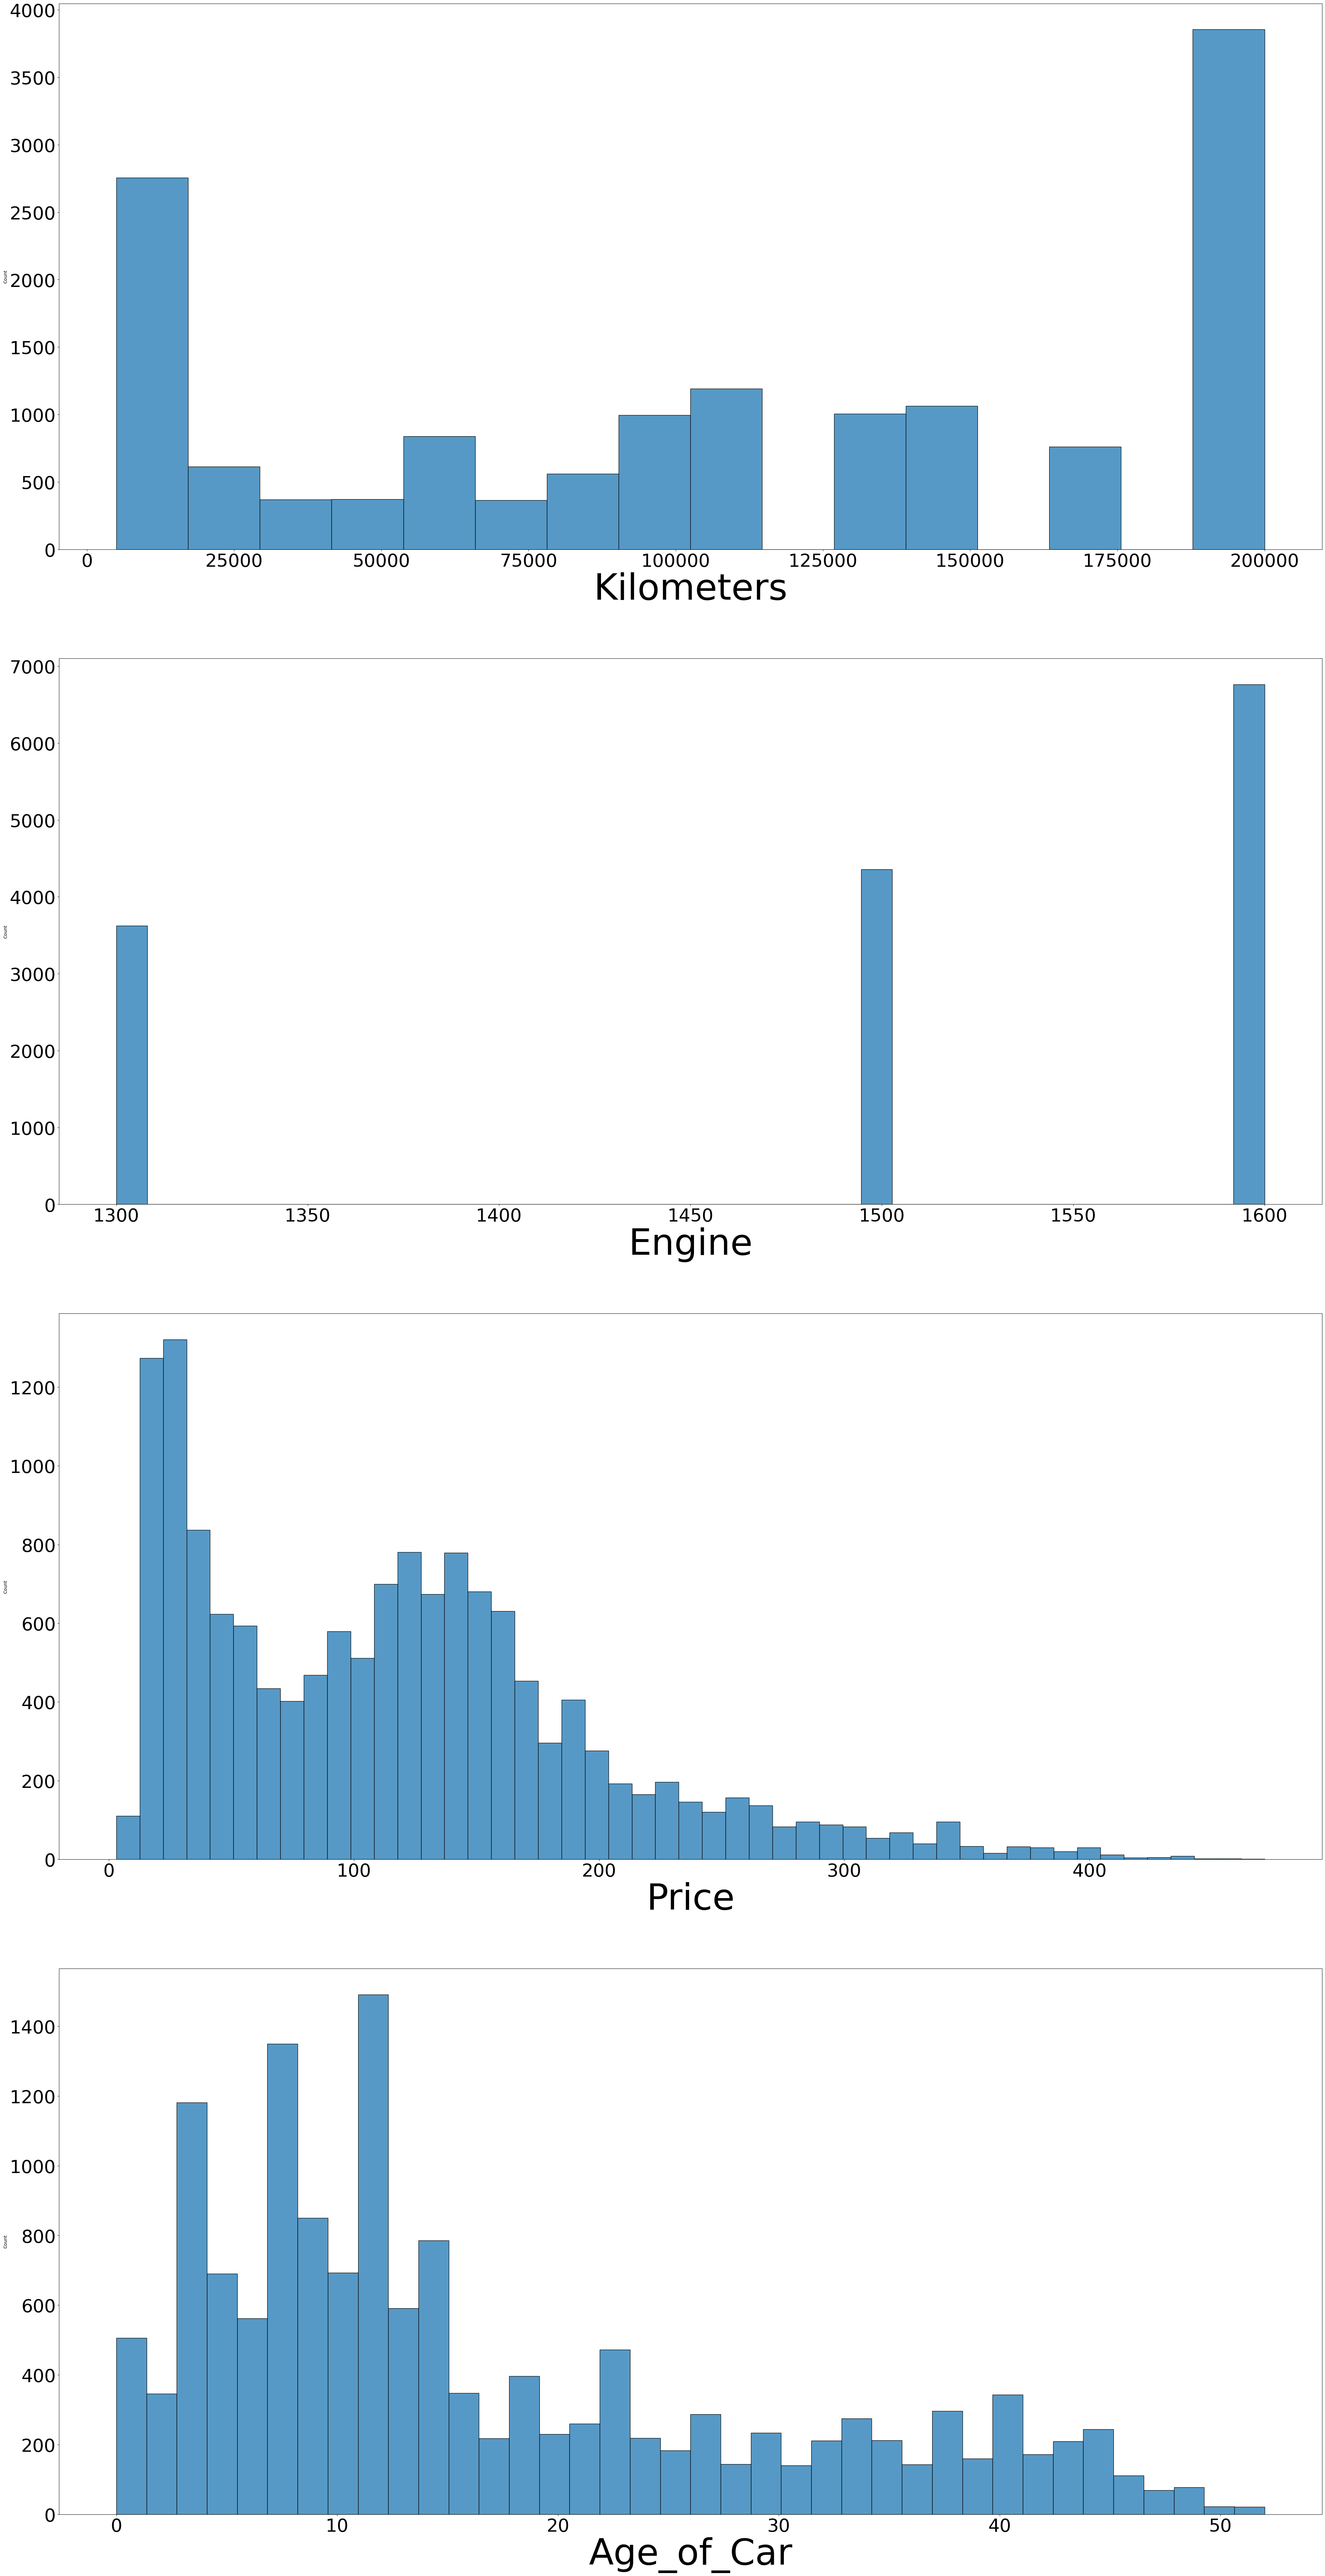

In [29]:
plt.figure(figsize = (50 , 100))
for i , col in enumerate (num_cols ,1) :
    plt.subplot((len(num_cols)//1) , 1 , i )
    sns.histplot(data = df_clean , x = col)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.xlabel(col, fontsize=80)

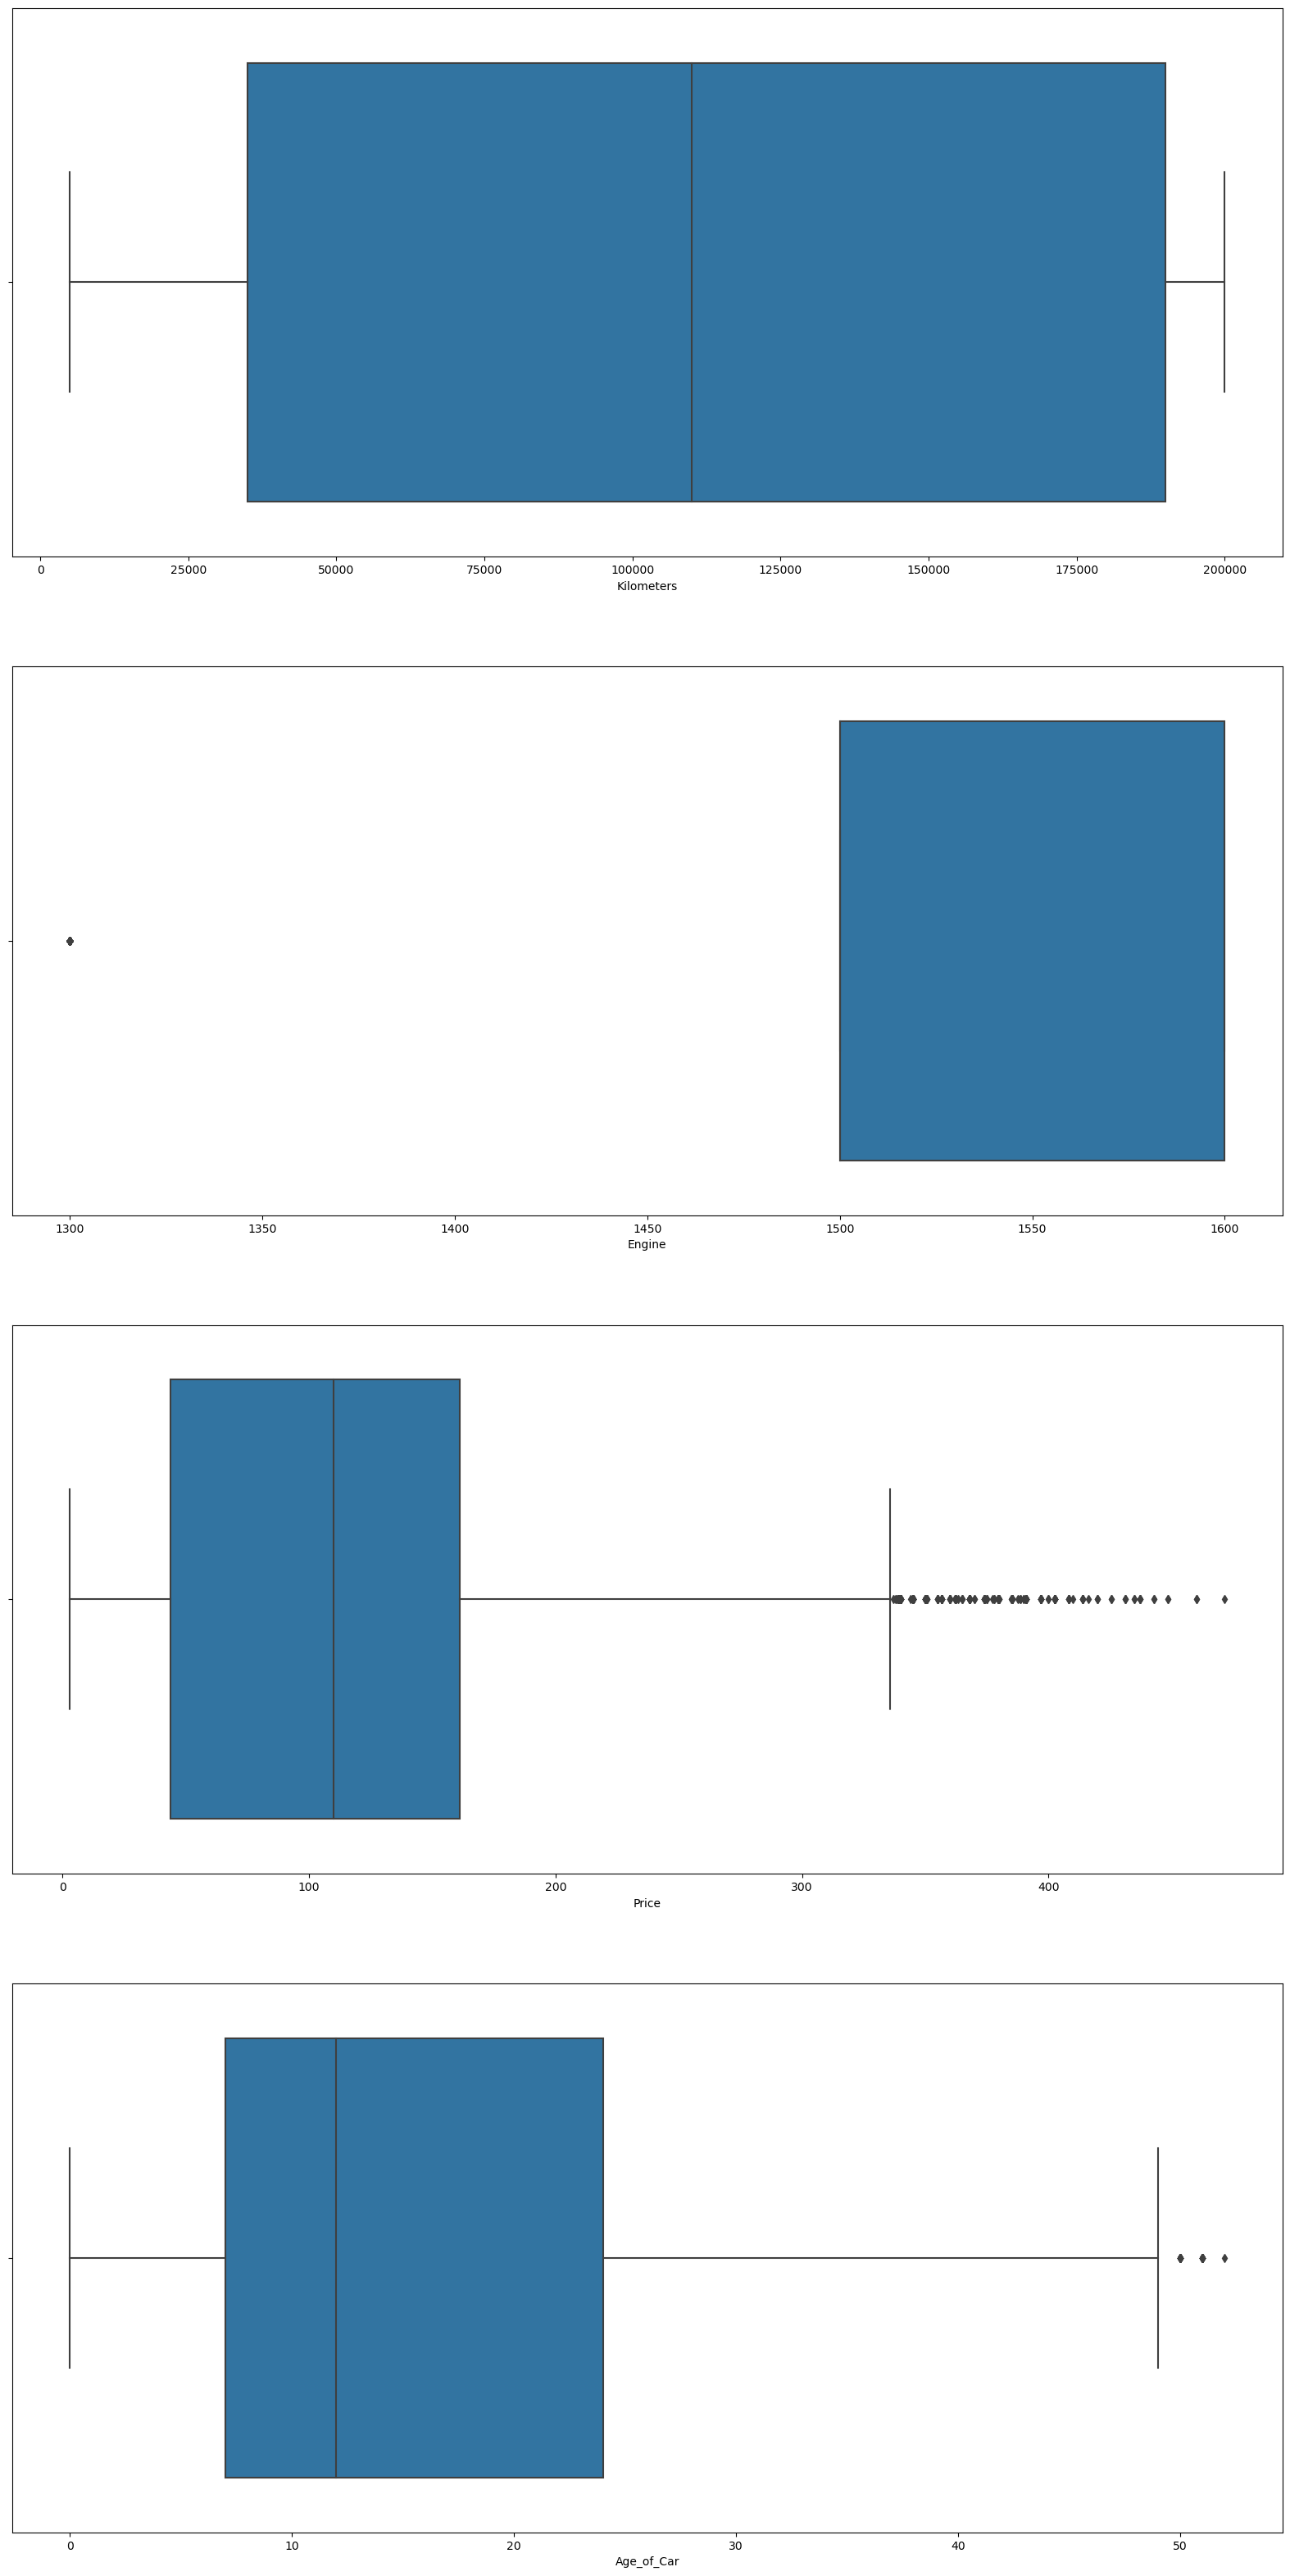

In [30]:
plt.figure(figsize = (20 , 40))
for i , col in enumerate (num_cols ,1) :
    plt.subplot((len(num_cols)//1) , 1 , i )
    sns.boxplot(data = df_clean , x = col)

## Bivariate Analysis

- __Q.1 Is there a significant relationship between a Brand and their likelihood to Price ?__

In [31]:
brand_price = df_clean.groupby('Brand')['Price'].mean().sort_values(ascending=False)
fig = px.bar(brand_price , color = brand_price.index )
fig.show()

- Hyundai cars are the highest.

- __Q.2 Is there a significant relationship between a Model and their likelihood to price ?__

In [32]:
model_price = df_clean.groupby('Model')['Price'].mean().sort_values(ascending=False)
fig = px.bar(model_price , color = model_price.index )
fig.show()

- Although the most-produced car in the dataset is the __128__, it represents the lowest average price and the __Tipo is the most-produced__.

- __Q.3 Is there a significant relationship between a Body and their likelihood to price ?__

In [33]:
body_price = df_clean.groupby('Body')['Price'].mean().sort_values(ascending=False)
fig = px.bar(body_price , color = body_price.index )
fig.show()

- __Q.4 Is there a significant relationship between a Fuel and their likelihood to price ?__

In [34]:
fuel_price = df_clean.groupby('Fuel')['Price'].mean().sort_values(ascending=False)
fig = px.bar(fuel_price , color = fuel_price.index )
fig.show()

- __Q.5 Is there a significant relationship between a Transmission and their likelihood to price ?__

In [35]:
Transmission_price = df_clean.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(Transmission_price , color = Transmission_price.index )
fig.show()

In [36]:
num_cols

['Kilometers', 'Engine', 'Price', 'Age_of_Car']

- __Q.6 Does the Kilometers of a customer have a significant impact on their likelihood to Price?__

In [37]:
fig = px.scatter(df_clean , x = (df_clean['Kilometers']),y= (df_clean['Price']), trendline='ols')
fig.show()

- It is natural for the relationship to be inverse, because with an increase in car traffic, it leads to a decrease in their prices

- __Q.7 Does the Engine of a customer have a significant impact on their likelihood to Price?__

In [38]:
fig = px.scatter(df_clean , x = (df_clean['Engine']),y= (df_clean['Price']), trendline='ols')
fig.show()

- We note that there is a direct relationship that when the Engine increases, the price of the car increases

- __Q.8 Does the Age_of_Car of a customer have a significant impact on their likelihood to Price?__

In [39]:
fig = px.scatter(df_clean , x = (df_clean['Age_of_Car']),y= (df_clean['Price']), trendline='ols')
fig.show()

- We note that the relationship is inverse, because the age of the car has increased and it has become old, so its price is cheap

# Data Preprocessing

## Outlier

In [40]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.


In [41]:
from datasist.structdata import detect_outliers

In [42]:
idx = detect_outliers(df_clean, 0, ['Engine', 'Price', 'Age_of_Car'])
idx

[1,
 4,
 5,
 9,
 10,
 14,
 23,
 25,
 26,
 34,
 42,
 51,
 54,
 55,
 63,
 68,
 69,
 72,
 84,
 88,
 89,
 91,
 97,
 98,
 115,
 116,
 122,
 124,
 126,
 127,
 131,
 136,
 139,
 145,
 152,
 154,
 157,
 164,
 165,
 167,
 171,
 175,
 180,
 182,
 183,
 184,
 191,
 194,
 196,
 198,
 201,
 204,
 209,
 215,
 216,
 223,
 228,
 229,
 233,
 236,
 238,
 239,
 243,
 245,
 247,
 248,
 252,
 254,
 263,
 266,
 271,
 272,
 282,
 286,
 290,
 291,
 294,
 297,
 299,
 302,
 303,
 306,
 307,
 310,
 318,
 326,
 327,
 330,
 331,
 335,
 336,
 338,
 340,
 341,
 347,
 349,
 361,
 364,
 366,
 369,
 370,
 376,
 377,
 384,
 385,
 397,
 399,
 401,
 402,
 404,
 405,
 407,
 414,
 424,
 428,
 437,
 438,
 441,
 446,
 451,
 452,
 456,
 459,
 463,
 465,
 466,
 468,
 469,
 471,
 473,
 474,
 476,
 478,
 479,
 484,
 487,
 488,
 491,
 492,
 494,
 495,
 496,
 498,
 504,
 509,
 511,
 512,
 515,
 517,
 518,
 523,
 529,
 530,
 532,
 533,
 535,
 537,
 538,
 539,
 543,
 546,
 547,
 548,
 550,
 551,
 555,
 557,
 558,
 563,
 567,
 568,
 5

In [43]:
outliers = df_clean.loc[idx] 
clean = df_clean.drop(idx, axis=0)

In [44]:
outliers

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Price,Gov,Age_of_Car
1,Hyundai,Accent,Sedan,Silver,Benzine,190000,1300,Manual,78.0,Qena,17
4,Hyundai,Accent,Sedan,Silver,Benzine,15000,1300,Manual,75.0,Giza,22
5,Hyundai,Accent,Sedan,Green,Benzine,200000,1300,Manual,57.0,Cairo,22
9,Hyundai,Accent,Sedan,Blue- Navy Blue,Benzine,170000,1300,Manual,90.0,Alexandria,16
10,Hyundai,Accent,Sedan,Silver,Benzine,15000,1300,Manual,80.0,Dakahlia,17
...,...,...,...,...,...,...,...,...,...,...,...
14560,Fiat,Tipo,Sedan,Black,Benzine,5000,1600,Automatic,431.2,Cairo,1
14561,Fiat,Tipo,Sedan,Brown,Benzine,85000,1600,Automatic,345.0,Qalyubia,2
14562,Fiat,Tipo,Hatchback,Red,Benzine,110000,1600,Manual,345.0,Cairo,1
14564,Fiat,Tipo,Hatchback,Blue- Navy Blue,Benzine,25000,1600,Manual,345.0,Cairo,1


In [45]:
clean

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Price,Gov,Age_of_Car
0,Hyundai,Accent,Sedan,Black,Benzine,150000,1600,Automatic,140.0,Giza,15
2,Hyundai,Accent,Sedan,Gray,Benzine,150000,1500,Manual,70.0,Giza,23
3,Hyundai,Accent,Sedan,Blue- Navy Blue,Benzine,150000,1600,Automatic,150.0,Cairo,13
6,Hyundai,Accent,Sedan,Red,Benzine,95000,1500,Automatic,185.0,Minya,10
7,Hyundai,Accent,Sedan,Gold,Benzine,190000,1500,Manual,70.0,Giza,23
...,...,...,...,...,...,...,...,...,...,...,...
14550,Fiat,Tipo,Hatchback,Red,Benzine,5000,1600,Automatic,322.0,Gharbia,1
14553,Fiat,Tipo,Sedan,Other Color,Benzine,5000,1600,Manual,322.0,Alexandria,1
14554,Fiat,Tipo,Sedan,Burgundy,Benzine,35000,1600,Manual,287.5,Cairo,2
14563,Fiat,Tipo,Sedan,Black,Benzine,75000,1600,Manual,218.5,Cairo,2


In [46]:
categorical_cols = list(clean.select_dtypes(include=['object']).columns)
categorical_cols

['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Transmission', 'Gov']

In [47]:
numerical_cols = list(clean.select_dtypes(include=['int64', 'float64']).columns)
numerical_cols.remove('Price')
numerical_cols

['Kilometers', 'Engine', 'Age_of_Car']

# Data Splitting

In [48]:
# Data Splitting into features and target
X = clean.drop('Price', axis=1)
y = clean['Price']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Data Preprocessing
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Kilometers', 'Engine', 'Age_of_Car']),
        ('cat', categorical_transformer, ['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Transmission', 'Gov'])])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Model Building

In [50]:
# Model Building
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(X_test_preprocessed)



# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))


RMSE: 32.840554328885034
R2: 0.7733786590835571


In [51]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = ridge.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 32.83514668641185
R2: 0.773453285490874


In [52]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = lasso.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 34.46714296958104
R2: 0.7503736550023739


In [53]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(3), Ridge())
poly.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = poly.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 25.472413853681026
R2: 0.863661016734887


In [54]:
#SVR regression
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = svr.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 31.30669003622905
R2: 0.7940536243604182


In [55]:
#DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = dt.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 32.261327858718964
R2: 0.7813022453761092


In [56]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=10 ,random_state=42, max_depth=19)
rf.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = rf.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 26.63934544599451
R2: 0.850883072762215


In [57]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators':range(8,12),
    'max_depth': range(15,25),
}
clf = RandomForestRegressor()
RCV = RandomizedSearchCV(estimator=clf, 
                   param_distributions=parameters, 
                   n_iter=3,
                   cv=3)

In [58]:
RCV.fit(X_train_preprocessed,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_depth': range(15, 25),
                                        'n_estimators': range(8, 12)})

In [59]:
RCV.best_params_

{'n_estimators': 9, 'max_depth': 21}

In [60]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=8 ,random_state=42, max_depth=15)
rf.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = rf.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 25.980216642525452
R2: 0.8581708882142483


In [61]:
rf.feature_importances_


array([0.03150201, 0.00532961, 0.35791493, 0.01337012, 0.03286378,
       0.01992893, 0.02449326, 0.01477923, 0.01005856, 0.00330255,
       0.00317564, 0.00469477, 0.00686437, 0.00669337, 0.00600884,
       0.00143491, 0.00102692, 0.26795617, 0.16206584, 0.00414512,
       0.00518016, 0.0064194 , 0.00522271, 0.00556881])

In [62]:
column_names = preprocessor.get_feature_names_out()

In [63]:
column_names.shape

(24,)

In [64]:
 rf.feature_importances_.shape

(24,)

In [65]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03150
Feature: 1, Score: 0.00533
Feature: 2, Score: 0.35791
Feature: 3, Score: 0.01337
Feature: 4, Score: 0.03286
Feature: 5, Score: 0.01993
Feature: 6, Score: 0.02449
Feature: 7, Score: 0.01478
Feature: 8, Score: 0.01006
Feature: 9, Score: 0.00330
Feature: 10, Score: 0.00318
Feature: 11, Score: 0.00469
Feature: 12, Score: 0.00686
Feature: 13, Score: 0.00669
Feature: 14, Score: 0.00601
Feature: 15, Score: 0.00143
Feature: 16, Score: 0.00103
Feature: 17, Score: 0.26796
Feature: 18, Score: 0.16207
Feature: 19, Score: 0.00415
Feature: 20, Score: 0.00518
Feature: 21, Score: 0.00642
Feature: 22, Score: 0.00522
Feature: 23, Score: 0.00557


In [66]:
pd.DataFrame({'Feature': column_names, 'Importance': rf.feature_importances_.round(3)}).sort_values('Importance', ascending=False)

,Feature,Importance
2,num__Age_of_Car,0.358
17,cat__Transmission_0,0.268
18,cat__Transmission_1,0.162
4,cat__Brand_1,0.033
0,num__Kilometers,0.032
6,cat__Model_1,0.024
5,cat__Model_0,0.020
7,cat__Model_2,0.015
3,cat__Brand_0,0.013
8,cat__Model_3,0.010


<Axes: >

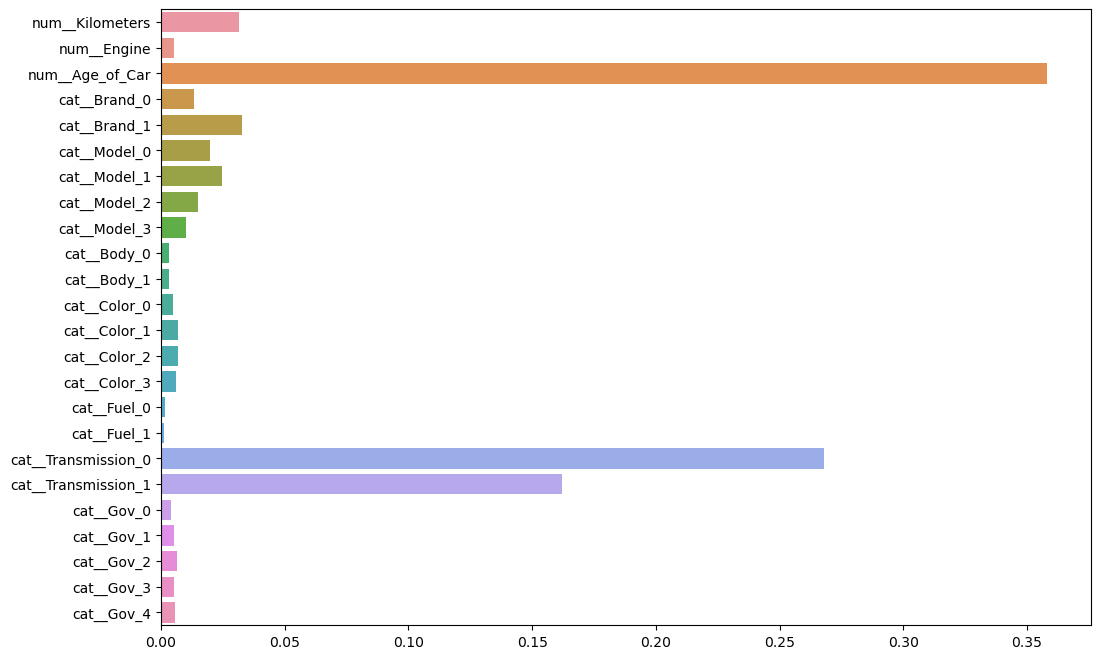

In [67]:
plt.figure(figsize=(12,8))
sns.barplot(x=rf.feature_importances_, y=column_names)

In [68]:
# Voting Regressor

from sklearn.ensemble import  VotingRegressor


lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(max_depth=10)
svr_reg = SVR(kernel='rbf')

# Voting Regressor
voting_reg = VotingRegressor(estimators=[('lr', lin_reg), ('dt', dt_reg), ('svr', svr_reg)])

# Fitting the data
voting_reg.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', voting_reg.score(X_train_preprocessed, y_train))
print('Testing Score: ', voting_reg.score(X_test_preprocessed, y_test))

Training Score:  0.870653427509057
Testing Score:  0.8355236951544449


In [69]:
# BaggingRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dt_reg = DecisionTreeRegressor(max_depth=10)

bag_reg = BaggingRegressor(dt_reg, n_estimators=100, bootstrap=True, random_state=42,
                           max_features=0.8)
                           

# Fitting the data
bag_reg.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', bag_reg.score(X_train_preprocessed, y_train))
print('Testing Score: ', bag_reg.score(X_test_preprocessed, y_test))

Training Score:  0.9161278839637068
Testing Score:  0.8680261749027106


In [70]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators':[100,200,300,400,500],
    'max_features': [0.7,0.8,0.9],
}
clf = BaggingRegressor()
RCV = RandomizedSearchCV(estimator=clf, 
                   param_distributions=parameters, 
                   n_iter=3,
                   cv=3)

In [71]:
RCV.fit(X_train_preprocessed,y_train)

RandomizedSearchCV(cv=3, estimator=BaggingRegressor(), n_iter=3,
                   param_distributions={'max_features': [0.7, 0.8, 0.9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [72]:
RCV.best_params_

{'n_estimators': 400, 'max_features': 0.8}

In [73]:
# BaggingRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dt_reg = DecisionTreeRegressor(max_depth=10)

bag_reg = BaggingRegressor(dt_reg, n_estimators=100, bootstrap=True, random_state=42,
                           max_features=0.8)
                           

# Fitting the data
bag_reg.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', bag_reg.score(X_train_preprocessed, y_train))
print('Testing Score: ', bag_reg.score(X_test_preprocessed, y_test))

Training Score:  0.9161278839637068
Testing Score:  0.8680261749027106


In [74]:
# AdaBoost Regressor

from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=200, random_state=42)

# Fitting the data
ada_reg.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', ada_reg.score(X_train_preprocessed, y_train))
print('Testing Score: ', ada_reg.score(X_test_preprocessed, y_test))

Training Score:  0.7387208253106263
Testing Score:  0.7289288000356899


In [75]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=42)

# Fitting the data
grad_reg.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', grad_reg.score(X_train_preprocessed, y_train))
print('Testing Score: ', grad_reg.score(X_test_preprocessed, y_test))

Training Score:  0.8857999334665654
Testing Score:  0.858324697176065


In [76]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators':[100,200,300,400,500],
    'max_depth': range(2,8),
}
clf = GradientBoostingRegressor()
RCV = RandomizedSearchCV(estimator=clf, 
                   param_distributions=parameters, 
                   n_iter=3,
                   cv=3)

In [77]:
RCV.fit(X_train_preprocessed,y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=3,
                   param_distributions={'max_depth': range(2, 8),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [78]:
RCV.best_params_

{'n_estimators': 500, 'max_depth': 5}

In [79]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=42)

# Fitting the data
grad_reg.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', grad_reg.score(X_train_preprocessed, y_train))
print('Testing Score: ', grad_reg.score(X_test_preprocessed, y_test))

Training Score:  0.9291053573959436
Testing Score:  0.8733278286918276


In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
# XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)

# Fitting the data
xgb.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', xgb.score(X_train_preprocessed, y_train))
print('Testing Score: ', xgb.score(X_test_preprocessed, y_test))

Training Score:  0.9046916193090624
Testing Score:  0.8682708176639233


In [82]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators':[100,200,300 ,400 ,500],
    'max_depth': range(3,10),
}
clf = XGBRegressor()
RCV = RandomizedSearchCV(estimator=clf, 
                   param_distributions=parameters, 
                   n_iter=3,
                   cv=3)

In [83]:
RCV.fit(X_train_preprocessed,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...x_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=3,
                   param_distributions={'max_depth': range(3, 10),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [84]:
RCV.best_params_

{'n_estimators': 200, 'max_depth': 3}

In [85]:
# XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fitting the data
xgb.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', xgb.score(X_train_preprocessed, y_train))
print('Testing Score: ', xgb.score(X_test_preprocessed, y_test))

Training Score:  0.9286248219982886
Testing Score:  0.8716907161810422


In [86]:
Models_Summarization = pd.DataFrame(
                {
                    
'Training Accuracy': [round(lr.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(poly.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(svr.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(dt.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(rf.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(voting_reg.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(bag_reg.score(X_train_preprocessed, y_train) * 100, 2),
                                          round(ada_reg.score(X_train_preprocessed, y_train) * 100, 2),
                                          round(grad_reg.score(X_train_preprocessed, y_train) * 100, 2),
                                          round(xgb.score(X_train_preprocessed, y_train) * 100, 2)], 
'Teasting Accuracy': [round(lr.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(poly.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(svr.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(dt.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(rf.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(voting_reg.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(bag_reg.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(ada_reg.score(X_test_preprocessed, y_test) * 100, 2),
                                         round(grad_reg.score(X_test_preprocessed, y_test) * 100, 2),
                                         round(xgb.score(X_test_preprocessed, y_test) * 100, 2)], 
              
                },
    
    index = ['Linear Regression', 'Polynomial Regression', 'SVR Regression', ' DecisionTreeRegressor', 
         'Random Forest Regressor', 'Voting Regressor', 'BaggingRegressor',
         'AdaBoost Regressor' , 'GradientBoostingRegressor','XGBoost']
            )

In [87]:
Models_Summarization

,Training Accuracy,Teasting Accuracy
Linear Regression,79.98,77.34
Polynomial Regression,90.38,86.37
SVR Regression,81.03,79.41
DecisionTreeRegressor,98.85,78.13
Random Forest Regressor,95.99,85.82
Voting Regressor,87.07,83.55
BaggingRegressor,91.61,86.80
AdaBoost Regressor,73.87,72.89
GradientBoostingRegressor,92.91,87.33
XGBoost,92.86,87.17


# Saving 

In [88]:
import pickle

In [89]:
# Preprocessor Saving
import pickle
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

# Model Saving
pickle.dump(grad_reg, open('model.pkl', 'wb'))

In [90]:
# Load Preprocessor
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))


## <center>Thanks For Following </center>
